# Projeto 1 - Ciência dos Dados

Nome: Pedro Paulo Moreno Camargo

Nome: Gabriel Brunoro Tumang

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

# Contextualização

O nosso grupo de Ciência dos Dados foi contratado pela Netflix para analisar a reação das pessoas em relação a recém lançada 5 temporada da série mundialmente conhecida "La Casa de Papel".

Para realizarmos essa análise temos que classificar diferentes Tweets como relevantes ou irrelevantes:

Os relevantes seriam Tweets que se encaixam nos tópicos abaixo:

-Falar bem ou mal da série sendo eles comentários construtivos ou não.

-Falar ou mencionar quinta temporada.

-Os Tweets em que mostra que a pessoas se emocionou assistindo a série.

Já os irrelevantes seriam os Tweets que não abordam nenhum desses tópicos.

Para realizar a classificação decidimos utilizar o Classificador Naive-Bayes, que é largamente utilizado em filtros anti-spam de e-mails.

##### Carregando algumas bibliotecas:


In [1]:
import os
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import nltk
from nltk.tokenize import word_tokenize
import emoji
import re     
from sklearn.model_selection import train_test_split
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to C:\Users\Pedro
[nltk_data]     Paulo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Pedro Paulo\Desktop\INSPER\2° SEMESTRE\Ciência dos Dados\Projeto1CDados\Projeto_1


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [3]:
filename = 'La Casa De Papel.xlsx'

In [4]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,Classificação
0,slc ontem comecei a ver “la casa de papel” man...,1
1,mds alguém me empresta netflix pra eu ver lá c...,0
2,se bolsonaro fosse um personagem de la casa de...,0
3,to vendo lá casa de papel pela 2 vez 🥺,0
4,@stefslvatore muri pfvr n me dá spoiler de la ...,0


In [5]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Classificação
0,la casa de papel me decepcionou em um nível..,1.0
1,eu assisti la casa de papel de uma vez só 🙄🤷🏽‍♀️,0.0
2,@pdrohsou eu vou dar!!!! ontem meu humor não t...,1.0
3,eu vou fazer igual o professor em lá casa de p...,0.0
4,me sentindo uma grandessíssima trouxa por ter ...,1.0


___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

O produto escolhido foi a série da netflix La Casa de Papel que teve sua quinta temporada lançada recentemente. Consideramos como tweets relevantes os tweets que falam ou mencionam sobre a quinta temporada em si, os que as pessoas se emocionaram com a série e os que falam bem ou mal da série independentemente de ser uma crítica construtiva ou não

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

# Limpeza de Caraceteres

##### Função para Remover links de Sites dos Tweets. Ex: https://www.google.com.br/webhp?hl=pt-BR&ictx=2&sa=X&ved=0ahUKEwjs-MbV4pLzAhURIrkGHX2WCX4QPQgJ


In [6]:
#Limpeza de Carateres 

def Remove_URL(dataframe,Index):
#Remove Url
    dataframe[Index] = dataframe[Index].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

Remove_URL(train, 'Treinamento')

Remove_URL(test, 'Teste')

##### Função para remover os usuários de um Tweet. Ex: @joao_123


In [7]:
#Limpa o Usuário a quem está sendo feita a Reply
def limpa_username(tweet):
    x = re.sub('@[\w]+ ','',tweet)
    return x

##### Função para separar emojis entre si e as palavra e limpar pontuações consideradas desnecessárias

In [8]:
def cleanup(text):
    #import string
    limpa_emoji=' '.join(emoji.get_emoji_regexp().split(text)) #Espaça os emojis entre eles e entre as palavras
    punctuation = '[!-.:?;/()\n“”]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', limpa_emoji)
    return text_subbed

##### Aplicação dessas Funções

In [9]:
#Aplica a exclusão das Caracteres e dos Usuarios nos Tweets de Treino
lista_sem_reply = []
for i in train.Treinamento:
    x = limpa_username(i)
    y = cleanup(x)
    lista_sem_reply.append(y)
    
#Aplica a exclusão das Caracteres e dos Usuarios nos Tweets de Teste
lista_teste_sem_reply = []
for i in test.Teste:
    x = limpa_username(i)
    y = cleanup(x)
    lista_teste_sem_reply.append(y)
    
    


train.Treinamento = lista_sem_reply

test.Teste = lista_teste_sem_reply

valores_teste = lista_teste_sem_reply 

valores = train.Treinamento











    


    
    
    

    




            




##### Remove Palavras como artigos pronomes e preposições. Exemplos: Eu, ele, uns, umas...

In [10]:
#Tira Stop Words como (artigos, pronomes, preposições ...)



Stop_Words = nltk.corpus.stopwords.words('portuguese')

def filtro(tweet):
    lista_palavras = tweet.split(' ')
    string = ''
    for palavra in lista_palavras:
        if palavra in Stop_Words:
            pass
        else:
            string += palavra + ' '
    return string.strip()


#Tira Stop Words como (artigos, pronomes, preposições ...) para tweets de Treinamento
lista_x = []       
for i in valores:
    filtrado = filtro(i)
    lista_x.append(filtrado)

#Tira Stop Words como (artigos, pronomes, preposições ...) para tweets de Teste    
lista_y = []
for i in valores_teste:
    filtrado = filtro(i)
    lista_y.append(filtrado)
    

teste_filtrado = test
    
train.Treinamento = lista_x

totalmente_filtrado = train

# Separação dos Tweets: Relevantes, Não Relevantes e Total

##### Armazena todas as palavras relevantes e irrelevantes separadamente em strings

In [11]:
#Pega as strings das palavras relevantes e irrelevantes e as armazena

#x é utilizado de contador
x = 0
relevantes = ''
irrelevantes = ''
for i in train.Classificação:
    if i == 1:
        relevantes += train.Treinamento[x] +  ' '
    else:
        irrelevantes += train.Treinamento[x]+ ' '
    x += 1

        

##### Guarda em uma base de dados(pd.Series) todas as palavras relevantes a partir da string anterior

In [12]:
#Pega todas as palavras incluindo repetidas que são consideradas relevantes e armazena numa lista
todas_palavras_relevantes = relevantes.split()

#Cria uma Série desta lista
serie_relevantes = pd.Series(todas_palavras_relevantes)

#Descobre as frequências absolutas das palavras
tabela_relevantes = serie_relevantes.value_counts()




##### Guarda em uma base de dados(pd.Series) todas as palavras irrelevantes

In [13]:
#Pega todas as palavras incluindo repetidas que são consideradas irrelevantes e armazena numa lista
todas_palavras_irrelevantes = irrelevantes.split()

#Cria uma Série desta lista
serie_irrelevantes = pd.Series(todas_palavras_irrelevantes)

#Descobre as frequências absolutas das palavras
tabela_irrelevantes = serie_irrelevantes.value_counts()



##### Guarda em uma lista todas as palavras relevantes e irrelevantes não repetidas

In [14]:
#Pega todas as palavras não repetidas
palavras_totais_nao_repetidas = []

for i in serie_relevantes:
    if i not in palavras_totais_nao_repetidas:
        palavras_totais_nao_repetidas.append(i)
        
        
for i in serie_irrelevantes:
    if i not in palavras_totais_nao_repetidas:
        palavras_totais_nao_repetidas.append(i)
        

        

##### Guarda em uma base de dados(pd.Series) todas as palavras incluindo repetições

In [15]:
#Pega todas as palavras incluindo repetidas
todas_palavras_repetidas = todas_palavras_irrelevantes + todas_palavras_relevantes 

#Cria uma Série desta lista
serie_total = pd.Series(todas_palavras_repetidas)

#Descobre as frequências absolutas das palavras
tabela_total = serie_total.value_counts()



##### Cria uma matriz em que cada Tweet presente na lista possui dentro de si uma lista de palavras

In [16]:
#Cria uma lista em que cada tweet da planilha Teste é separado por suas respectivas palavras

testes = []

for i in range(0,len(test.Classificação)):
    testes.append(test.Teste[i].split())
    
    

    

# Probabilidades Iniciais

Primeiramente é necessário descobrir a probabilidade de palavras relevantes ou irrelevantes em relação as palavras totais.

-NI( Número de palavras Irrelevantes)

-NR (Número de palavras Relevantes)

-Total


$\quad P(R) = \frac{NR}{Total}$

$\quad P(I)= \frac{NI}{Total}$

In [17]:
#Probabilidades do Tweet ser relevante ou não baseado na planilha Treinamento
P_r = len(todas_palavras_relevantes)/len(todas_palavras_repetidas)

P_i = len(todas_palavras_irrelevantes)/len(todas_palavras_repetidas)

print(P_r + P_i)

1.0


# Naive-Bayes

É possível utilizar o **Teorema de Bayes** para obter uma probabilidade condicional $P(R|Tweet)$ da seguinta forma:

$$P(R|Tweet) = \frac{P(Tweet|R) P(R)}{P(Tweet)}$$

<br>

<br>

O processo é análogo para $P(I|Tweet)$:

$$P(I|Tweet) = \frac{P(Tweet|I) P(I)}{P(Tweet)}$$

Probabilidades necessárias para realizar o calculo: 
- $P(R|Tweet)$
- $P(I|Tweet)$
- $P(R)$:
- $P(I)$
- $P(Tweet)$


### A ingenuidade - Naïve Bayes

A parte ingênua do Naïve Bayes, que consiste em assumir que as palavras são independentes entre si e que sua ordem na frase não importa. 


Ou seja:

p = primeira palavra

p2 = segunda palavra

pn = n-ésima palavra 

$\quad P(R|Tweet) = 
\frac{P(p|R)\cdot P(p2|R)\cdot P(p3|R)\cdot ... P(pn|R)\cdot P(R)\cdot}{P(Tweet)}$

$\quad P(I|Tweet) = 
\frac{P(p|I)\cdot P(p2|I)\cdot P(p3|I)\cdot ... P(pn|I)\cdot P(I)\cdot}{P(Tweet)}$

<br>


#### Mas e se a palavra n não existir em R ou I?

$P(pn|I) = 0$

$P(pn|R) = 0$

usando a formula acima:

$P(R|Tweet) = 0$

$P(I|Tweet) = 0$

Isso é incabível, como resolver?

Uma maneira é o método de Suavização de Laplace

###  Suavização de Laplace

Variáveis:

Far = Frequência absoluta relevante da palavra no conjunto de palavras relevantes

Prr =Frequência absoluta de palavras relevantes incluindo repetidas

Ptnr = Frequência absoluta do total de palavras não incuindo palavras repetidas

Fir = Frequência absoluta da palavra no conjunto de palavras irrelevantes 

Pir = Frequência absoluta de palavras irrelevantes incluindo repetidas



*Suavização de Laplace*:


$ P(pn|R) = \frac{Far + 1}{Prr + Ptnr}$

$ P(pn|I) = \frac{Fai + 1}{Pir + Ptnr}$

Desse modo:

Caso não haja a palavra na base de dados R ou I:

$ P(pn|R) = \frac{0 + 1}{Prr + Ptnr}$

$ P(pn|I) = \frac{0 + 1}{Pir + Ptnr}$

Desse modo $ P(pn|R)$ e $ P(pn|I)$ são diferentes de 0, impedindo o que aconteceu anteriormente.

Já que os dois estão sendo divididos por $P(Tweet)$ é possível cortar essa probabilidade.

Aplicando a formula abaixo a partir de laplace:

$\quad P(R|Tweet) = P(p|R)\cdot P(p2|R)\cdot P(p3|R)\cdot ... P(pn|R)\cdot P(R)$

$\quad P(I|Tweet) = P(p|I)\cdot P(p2|I)\cdot P(p3|I)\cdot ... P(pn|I)\cdot P(I)$


Assim, a **Classificação da frase** se dará conforme abaixo:

$\quad \Rightarrow$ Se $P(R|Tweet) > P(I|Tweet)$, então o Tweet será classificado como de *Relevante*

$\quad \Rightarrow$ Se $P(R|Tweet) < P(I|Tweet)$, então o Tweet será classificado como de *Irrelevante*

### Colocando isto em prática:

#### Funções:

In [18]:


#Função que descobre a frequência absoluta relevante de uma das palavras de um Tweet
def ocorrencias_relevantes(palavra):
    if palavra not in todas_palavras_relevantes:
        freq_absoluta_relevante = 0
    else:
        freq_absoluta_relevante = tabela_relevantes[palavra]
    return freq_absoluta_relevante

#Função que descobre a frequência absoluta irrelevante de uma das palavras de um Tweet
def ocorrencias_irrelevantes(palavra):
    if palavra not in todas_palavras_irrelevantes:
        freq_absoluta_irrelevante = 0
    else:
        freq_absoluta_irrelevante = tabela_irrelevantes[palavra]
    return freq_absoluta_irrelevante

#### Aplicando o Classificador:

In [19]:
#Cria uma lista com os valores 0 e 1 para não relevante e relevante respectivamente
lista_classificador = []
    
for i in range(0,len(testes)):
    #É necessário começar com o valor 1 já que o valor incial 0 multiplicado por qualquer número da 0 e multiplicado por 1 o primeiro valor da ele mesmo
    
    multiplicação_dos_laplaces_relevante = 1
    
    multiplicação_dos_laplaces_irrelevante = 1
    
    for palavra in testes[i]:
        #Descobre a frequência absoluta relevante
        freq_absoluta_relevante = ocorrencias_relevantes(palavra)
        
        #Descobre a frequência absoluta irrelevante
        freq_absoluta_irrelevante = ocorrencias_irrelevantes(palavra)
        
        #Usa a suavização de Laplace para certa palavra do Tweet e tem seu valor multiplicado pelas suavizações anteriores ou posteriores
        multiplicação_dos_laplaces_relevante *= (freq_absoluta_relevante + 1)/(len(todas_palavras_relevantes) + len(palavras_totais_nao_repetidas) )
        
        multiplicação_dos_laplaces_irrelevante *= (freq_absoluta_irrelevante + 1)/(len(todas_palavras_irrelevantes) + len(palavras_totais_nao_repetidas))
        
    #Calculo da Probabilidade do Tweet ser relevante ou não
    Prob_tweet_relevante = P_r * multiplicação_dos_laplaces_relevante
    Prob_tweet_irrelevante = P_i * multiplicação_dos_laplaces_irrelevante
    
    #Classifica os Tweets de acordo com as probabilidades
    if Prob_tweet_relevante > Prob_tweet_irrelevante:
        lista_classificador.append(1)
        
    else:
        lista_classificador.append(0)
        
        

#Adiciona mais uma coluna com os valores classificados para o serial test            
test['Naive-Bayes'] = lista_classificador     
            


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [20]:
#Data Frame com adição do classificador
test.head(10)

,Teste,Classificação,Naive-Bayes
0,la casa de papel me decepcionou em um nível,1.0,1
1,eu assisti la casa de papel de uma vez só 🙄 ...,0.0,1
2,eu vou dar ontem meu humor não tava dos melhor...,1.0,0
3,eu vou fazer igual o professor em lá casa de p...,0.0,0
4,me sentindo uma grandessíssima trouxa por ter ...,1.0,0
5,nem falei mas achei essa temporadade la casa d...,1.0,1
6,esse final de la casa de papel tnc que odio 🤬 🥺,1.0,1
7,um seriado que todo mundo já assistiu mas eu n...,0.0,0
8,professor la casa de papel,0.0,0
9,viu a temporada que lançou de la casa de papel...,1.0,1


# Comparação do Classificador x Base de Testes

In [21]:
#Cria uma tabela comparativa entre o classificador e a base de testes
Tabela_Comparativa = pd.crosstab(test.Classificação, test['Naive-Bayes'], normalize = True).mul(100).round(4)
display(Tabela_Comparativa.astype(str)+'%')

Naive-Bayes,0,1
Classificação,,
0.0,35.0%,20.5%
1.0,13.5%,31.0%


##### Calculando quantidade de acerto e erros do classificador  

In [22]:
#Porcentagem de acertos
acuracia = Tabela_Comparativa[0][0] + Tabela_Comparativa[1][1]
#Verdadeiro Negativo porcentagem
vn = Tabela_Comparativa[0][0]
#Verdadeiro Positivo porcentagem
vp = Tabela_Comparativa[1][1]
#Falso Positivo porcentagem
fp = Tabela_Comparativa[1][0]
#Falso Negativo porcentagem
fn = Tabela_Comparativa[0][1]

print('A porcentagem de mensagens relavantes consideradas relevantes foi de {}% .'.format(vp))
print('A porcentagem de mensagens relavantes consideradas irrelevantes foi de {}% .'.format(fn))
print('A porcentagem de mensagens irrelavantes consideradas relevantes foi de {}% .'.format(fp))
print('A porcentagem de mensagens irrelavantes consideradas irrelevantes foi de {}% .'.format(vn))
print('A acurácia do modelo é de {}%'.format(acuracia))

A porcentagem de mensagens relavantes consideradas relevantes foi de 31.0% .
A porcentagem de mensagens relavantes consideradas irrelevantes foi de 13.5% .
A porcentagem de mensagens irrelavantes consideradas relevantes foi de 20.5% .
A porcentagem de mensagens irrelavantes consideradas irrelevantes foi de 35.0% .
A acurácia do modelo é de 66.0%


___
### Concluindo

Em suma, nosso classificador teve uma performance razoável, já que possui uma acurácia de 66.0%, sendo assim 66.0% das mensagens foram classificadas como deveriam.

Entre as mensagens, elas foram classificadas de 4 maneiras diferentes:

-As verdadeiras positivas que constituem 31,0%, sendo elas mensagens relevantes classificadas como relevantes.

-As verdadeiras negativas que constituem 35,0%, sendo elas mensagens irrelevantes e que são
classificadas como irrelevantes.

-As falso positivos que constituem 20,5%, sendo elas mensagens irrelevantes e que são classificadas
como relevantes.

-As falsos negativos que constituem 13,5% das mensagens, sendo elas mensagens relevantes e que são classificadas
como irrelevantes.

A maior quantidade de erros do nosso classificador são dados por falsos positivos, a performance do nosso modelo pode ter sido afetada por diferentes razões:

-Uma dessas razões é o fato que o classificador é dependente da base de dados usada no treinamento, sendo assim a chance dele classificar errôneamente uma frase aumenta caso várias palavras dessa frase não estejam nessa base de dados. Isso o torna enviesado a partir de sua base de dados usada em seu treinamento.

-Outra delas é dada por o classificador calcular a possibilidade de uma mensagem ser relevante ou não por um modelo inteiramente matemático, sem levar em conta o sentido semântico de palavras e gírias da língua portuguesa. 

Como dito antes o classificador não leva em conta o sentido semântico do Tweet, podendo observar mais claramente isso nos casos de sarcasmo e dupla negação. Relembrando no nosso projeto os Tweets foram classificados como relevante caso eles fizessem parte de um desses tópicos:

-Falar bem ou mal da série sendo eles comentários construtivos ou não.

-Falar ou mencionar quinta temporada.

-Os Tweets em que mostra que a pessoas se emocionou assistindo a série.

Sendo assim, as frases de sarcasmo e dupla negação podem ser consideradas irrelevantes quando o tópico é falar positivamente ou negativamente da série. Um exemplo que não está na base de treinamento ou de testes é a frase "Eu amo a série #sqn" ou a frase "Eu não vi ninguém que realmente gosta série", nessas frases o sentido semântico não importa já que mesmo que o classificador veja essa frase como um comentário que fala bem ou mal da série a única coisa que importa é so classificador conseguirá classificar essa mensagem como relevante ou não.

Ocorre uma coisa parecida para o tópico de falar sobre a quinta temporada, já que nele as frases de sarcasmo e dupla negação podem ser consideradas irrelevantes, uma vez que caso ele mencione a quinta temporada não importa se a frase possui sarcasmo ou dupla negação.

Já no tópico da pessoas terem se emocionado assistindo a série as frases de sarcasmo e dupla negação podem impactar a classificação. Para ver isso em prática foi adicionado um Tweet sarcástico pela nossa equipe na posição 200 da base de dados(esse Tweet por não ter sido classificação manualmente não impacta a acurácia do classificador calculada préviamente) , nele o Tweet que era pra ser classificado como irrelevante foi classificado como relevante, dessa maneira é possível enxergar como nosso modelo matemático é ingenuo nesse tópico já pode acabar se confundindo em relação a frases sarcásticas e de dupla negação.

Nossa equipe possui um plano de expansão em mente para o futuro, ele consiste em:

-Lematizar as palavras da base de dados a fim de aumentar ainda mais a acurácia, já que palavras diferentes como jogam e jogar seriam consideradas uma única palavra após a lematização.

-Comparar diferentes resultados da classificação baseados em diferentes dados usados pra o treino a fim de diminuir o viés do classificador.

-Criar um classificador diferente para cada tópico facilitando a busca por dados específicos pela empresa.


Dado a proposta de expansão acima acredito que esse projeto deve continuar com o seu financiamento.


___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [95]:
#Reutilizando as funções anteriores
train = pd.read_excel(filename)

test = pd.read_excel(filename, sheet_name = 'Teste')

x = train.rename(columns={"Treinamento":"Geral"})

teste_normal = test.drop([200], axis=0)

y = teste_normal.rename(columns={"Teste":"Geral"})

dataframe_combinado = pd.concat([x,y])


#Limpando Tweets
Remove_URL(dataframe_combinado, 'Geral')


contador = 0
lista_combinado = []
for i in dataframe_combinado.Geral:
    x = limpa_username(i)
    y = cleanup(x)
    lista_combinado.append(y)
    


dataframe_combinado.Geral = lista_combinado

valor_combinado = dataframe_combinado.Geral


#Stop Words
lista_x = []       
for i in dataframe_combinado.Geral:
    filtrado = filtro(i)
    lista_x.append(filtrado)

    
    
dataframe_combinado.Geral = lista_x

dataframe_combinado



  

,Geral,Classificação
0,slc ontem comecei ver la casa papel maneiro de...,1.0
1,mds alguém empresta netflix pra ver lá casa pa...,0.0
2,bolsonaro personagem la casa papel definitivam...,0.0
3,to vendo lá casa papel 2 vez 🥺,0.0
4,muri pfvr n dá spoiler la casa papel n vi 1 te...,0.0
...,...,...
195,tô chorando causa lá casa papel né gente,1.0
196,criador la casa papel reescreveu final 33 veze...,0.0
197,realidade vis vis ruim la casa papel ficando ruim,1.0
198,q q vou fazer agr terminei la casa papel,0.0


In [59]:
acuracias = []

for i in range(0,100):
    X_train, X_test = train_test_split(dataframe_combinado[["Geral","Classificação"]], test_size=0.4)

    df_relevantes = X_train.loc[X_train.Classificação == 1.0]

    df_irrelevantes = X_train.loc[X_train.Classificação == 0.0]

    relevante = ''
    for i in df_relevantes.Geral:
        relevante += i +  ' '


    irrelevante = ''

    for i in df_irrelevantes.Geral:
        irrelevante += i + ' '

    #Pega todas as palavras incluindo repetidas que são consideradas relevantes e armazena numa lista
    todas_palavras_relevantes = relevante.split()

    #Cria uma Série desta lista
    serie_relevantes = pd.Series(todas_palavras_relevantes)

    #Descobre as frequências absolutas das palavras
    tabela_relevantes = serie_relevantes.value_counts()


    #Pega todas as palavras incluindo repetidas que são consideradas irrelevantes e armazena numa lista
    todas_palavras_irrelevantes = irrelevante.split()

    #Cria uma Série desta lista
    serie_irrelevantes = pd.Series(todas_palavras_irrelevantes)

    #Descobre as frequências absolutas das palavras
    tabela_irrelevantes = serie_irrelevantes.value_counts()


    #Pega todas as palavras não repetidas
    palavras_totais_nao_repetidas = []

    for i in serie_relevantes:
        if i not in palavras_totais_nao_repetidas:
            palavras_totais_nao_repetidas.append(i)


    for i in serie_irrelevantes:
        if i not in palavras_totais_nao_repetidas:
            palavras_totais_nao_repetidas.append(i)

    #Pega todas as palavras incluindo repetidas
    todas_palavras_repetidas = todas_palavras_irrelevantes + todas_palavras_relevantes 

    #Cria uma Série desta lista
    serie_total = pd.Series(todas_palavras_repetidas)

    #Descobre as frequências absolutas das palavras
    tabela_total = serie_total.value_counts()


    #Cria uma lista em que cada tweet da planilha Teste é separado por suas respectivas palavras
    testes = []
    for i in X_test.Geral:
        testes.append(i.split())

    lista_classificador = []

    for i in range(0,len(testes)):
        #É necessário começar com o valor 1 já que o valor incial 0 multiplicado por qualquer número da 0 e multiplicado por 1 o primeiro valor da ele mesmo

        multiplicação_dos_laplaces_relevante = 1

        multiplicação_dos_laplaces_irrelevante = 1

        for palavra in testes[i]:
            #Descobre a frequência absoluta relevante
            freq_absoluta_relevante = ocorrencias_relevantes(palavra)

            #Descobre a frequência absoluta irrelevante
            freq_absoluta_irrelevante = ocorrencias_irrelevantes(palavra)

            #Usa a suavização de Laplace para certa palavra do Tweet e tem seu valor multiplicado pelas suavizações anteriores ou posteriores
            multiplicação_dos_laplaces_relevante *= (freq_absoluta_relevante + 1)/(len(todas_palavras_relevantes) + len(palavras_totais_nao_repetidas) )

            multiplicação_dos_laplaces_irrelevante *= (freq_absoluta_irrelevante + 1)/(len(todas_palavras_irrelevantes) + len(palavras_totais_nao_repetidas))

        #Calculo da Probabilidade do Tweet ser relevante ou não
        Prob_tweet_relevante = P_r * multiplicação_dos_laplaces_relevante
        Prob_tweet_irrelevante = P_i * multiplicação_dos_laplaces_irrelevante

        #Classifica os Tweets de acordo com as probabilidades
        if Prob_tweet_relevante > Prob_tweet_irrelevante:
            lista_classificador.append(1)

        else:
            lista_classificador.append(0)


    #Adiciona mais uma coluna com os valores classificados para o serial test            
    X_test['Modelo'] = lista_classificador

    Tabela_Comparativa = pd.crosstab(X_test.Classificação, X_test.Modelo, normalize = True).mul(100).round(4)

    acuracia = Tabela_Comparativa[0][0] + Tabela_Comparativa[1][1]

    acuracias.append(acuracia)

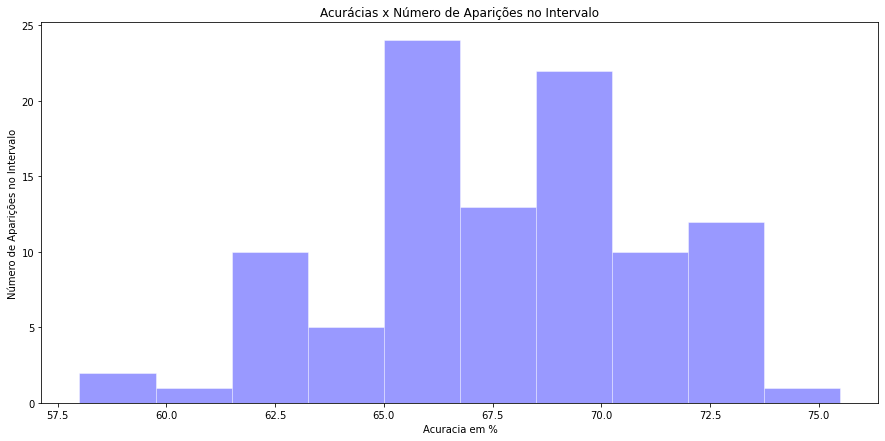

In [92]:
plt.figure(figsize=(15 ,7))

plt.subplot(111)
plt.hist(acuracias, bins=10 , color='blue', edgecolor='white', alpha=0.4)
plt.title('Acurácias x Número de Aparições no Intervalo')
plt.xlabel('Acuracia em %')
plt.ylabel('Número de Aparições no Intervalo')
plt.show()



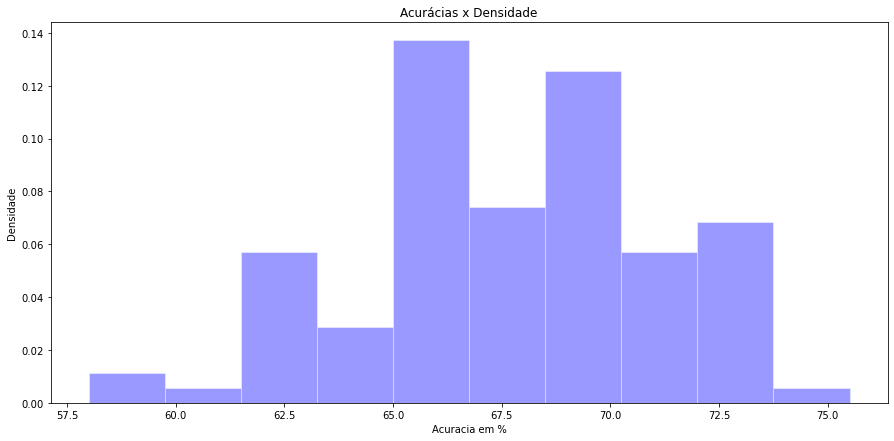

In [94]:
plt.figure(figsize=(15 ,7))
plt.subplot(111)
plt.hist(acuracias, bins=10 , color='blue', edgecolor='white',density = True, alpha=0.4)
plt.title('Acurácias x Densidade')
plt.xlabel('Acuracia em %')
plt.ylabel('Densidade')
plt.show()

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis
* CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
    
https://datascienceparichay.com/article/pandas-rename-column-names/

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://www.youtube.com/watch?v=ZHPwPHkrT4I&ab_channel=EvidenceN

https://www.youtube.com/watch?v=yKsqn3JN4Qg&ab_channel=JieJenn

https://stackabuse.com/removing-stop-words-from-strings-in-python/

https://qastack.com.br/programming/5486337/how-to-remove-stop-words-using-nltk-or-python

https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python

https://stackoverflow.com/questions/50830214/remove-usernames-from-twitter-data-using-python

Materiais de Aula

Alguns links de Referência foram perdidos por terem sido utilizados há mais de uma semana